In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

In [4]:
def build_first_cnn():
    model = models.Sequential([
        # Conv Block 1
        layers.Conv2D(32, (3, 3), strides = 1, padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),

        # Conv Block 2
        layers.Conv2D(64, (3, 3), strides = 1, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),

        # Conv Block 3
        layers.Conv2D(128, (3, 3), strides = 1, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.1),

        # Flatten and Dense
        layers.GlobalAveragePooling2D(),
        
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        # Output Layer
        layers.Dense(10, activation='softmax')
    ])
    return model


In [5]:
def plot_training_history(history):
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [6]:
def train_model():
    model = build_first_cnn()
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    lr_schedule1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)

    
    model.compile(optimizer=optimizer,
                  loss=loss_fn,
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=40,
                        validation_split=0.1, batch_size=256, callbacks=[lr_schedule1, early_stop])

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"\n Test accuracy: {test_acc * 100:.2f}%")

    plot_training_history(history)

    return model, history


Epoch 1/40
176/176 [==============================] - 11s 30ms/step - loss: 1.7461 - accuracy: 0.4079 - val_loss: 3.2479 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 2/40
176/176 [==============================] - 4s 24ms/step - loss: 1.4016 - accuracy: 0.5401 - val_loss: 3.2141 - val_accuracy: 0.1812 - lr: 0.0010
Epoch 3/40
176/176 [==============================] - 4s 24ms/step - loss: 1.2612 - accuracy: 0.6015 - val_loss: 1.6144 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 4/40
176/176 [==============================] - 4s 25ms/step - loss: 1.1577 - accuracy: 0.6496 - val_loss: 1.4244 - val_accuracy: 0.5412 - lr: 0.0010
Epoch 5/40
176/176 [==============================] - 4s 25ms/step - loss: 1.0884 - accuracy: 0.6759 - val_loss: 1.2109 - val_accuracy: 0.6242 - lr: 0.0010
Epoch 6/40
176/176 [==============================] - 4s 23ms/step - loss: 1.0384 - accuracy: 0.6986 - val_loss: 1.2407 - val_accuracy: 0.6300 - lr: 0.0010
Epoch 7/40
176/176 [==============================] - 4s 24ms/s

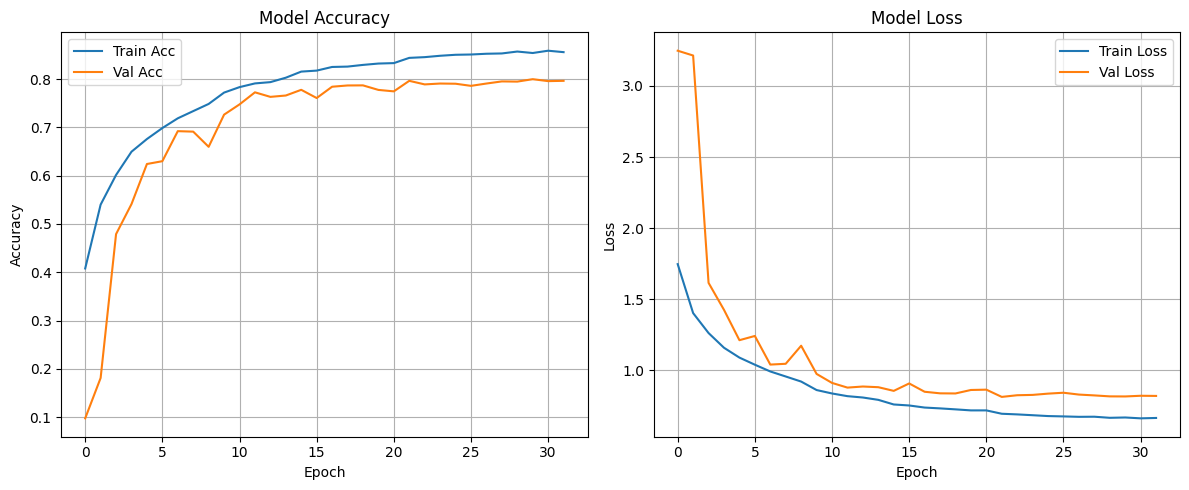

In [7]:
model, history = train_model()


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [10]:
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
)

from keras import Model
from keras.models import Sequential

from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.optimizers import RMSprop

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train data shape:", x_train.shape) 
print("Test data shape:", x_test.shape)

Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [12]:
base_model = ResNet50(
    include_top=False, weights="imagenet"
)

# We freeze all but the last layers, so only the last layer's weights are trainable
for layer in base_model.layers[:143]:
    layer.trainable = False

94765736/94765736 [==============================] - 6s 0us/step


In [13]:
model = Sequential(
    [
        layers.Lambda(lambda image: tf.image.resize(image, (224, 224))),
        base_model,
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer=RMSprop(0.00002), loss="categorical_crossentropy", metrics=["accuracy"])

lr_schedule = (
    ReduceLROnPlateau(
        patience=1, factor=0.5, min_lr=1e-6, monitor="val_accuracy", verbose=1
    ),
)

es = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True
)

In [14]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    callbacks=[es, lr_schedule],
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10
1250/1250 [==============================] - 191s 145ms/step - loss: 1.8817 - accuracy: 0.3689 - val_loss: 0.6902 - val_accuracy: 0.8638 - lr: 2.0000e-05
Epoch 2/10
1250/1250 [==============================] - 178s 142ms/step - loss: 1.2218 - accuracy: 0.6076 - val_loss: 0.4834 - val_accuracy: 0.9026 - lr: 2.0000e-05
Epoch 3/10
1250/1250 [==============================] - 179s 143ms/step - loss: 0.9490 - accuracy: 0.7248 - val_loss: 0.3821 - val_accuracy: 0.9211 - lr: 2.0000e-05
Epoch 4/10
1250/1250 [==============================] - 180s 144ms/step - loss: 0.7658 - accuracy: 0.7944 - val_loss: 0.3065 - val_accuracy: 0.9321 - lr: 2.0000e-05
Epoch 5/10
1250/1250 [==============================] - 180s 144ms/step - loss: 0.6273 - accuracy: 0.8436 - val_loss: 0.2585 - val_accuracy: 0.9369 - lr: 2.0000e-05
Epoch 6/10
1250/1250 [==============================] - 181s 144ms/step - loss: 0.5160 - accuracy: 0.8787 - val_loss: 0.2367 - val_accuracy: 0.9409 - lr: 2.0000e-05
Epoch 7/10


Final Test Accuracy: 0.9437


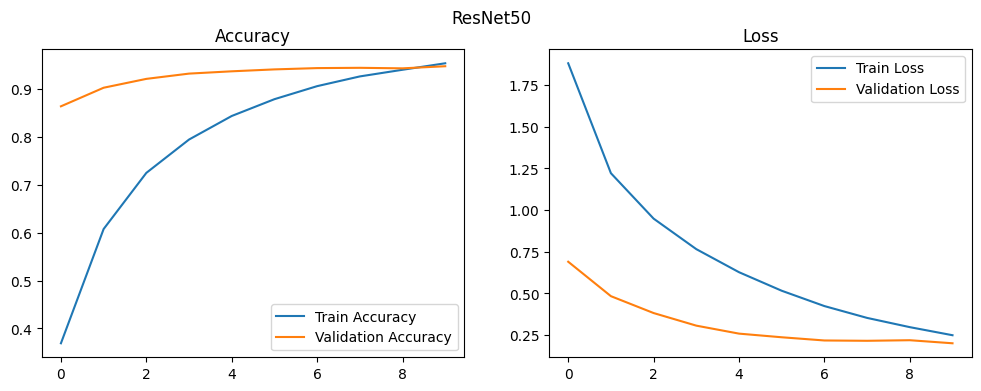

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()


plot_history(history, "ResNet50")